In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
np.random.seed(1)

In [3]:
x0s = np.random.normal(loc=3, size=(1000, 2))
y0s = np.zeros(1000)
x1s = np.random.normal(loc=6, size=(1000, 2))
y1s = np.ones(1000)

In [4]:
xs = np.concatenate((x0s, x1s))
ys = np.concatenate((y0s, y1s))

In [5]:
def shuffle(xs, ys):
    idxs = np.random.choice(len(xs), len(xs), replace=False)
    return xs[idxs], ys[idxs]

In [6]:
xs, ys = shuffle(xs, ys)

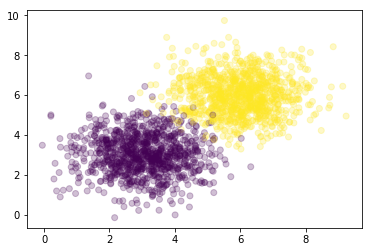

In [7]:
plt.scatter(xs[:,0], xs[:,1], c=ys, alpha=0.25)
plt.show()

In [8]:
def calc_error(y_hat, y, eps=0.0001):
    """
    Binary cross-entropy error between labels, y, and predictions, y_hat 
    """
    error = - y * np.log(y_hat + eps) - (1 - y) * np.log(1 - y_hat + eps)
    return error

In [9]:
np.log(0)

/home/ben/miniconda3/envs/pytorch04/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


-inf

In [10]:
def calc_errors(y_hats, ys):
    """
    Calculates the average error between a list of predictions, y_hats
    and a list of labels, ys.
    """
    error = np.mean([calc_error(y_hat, y) for y_hat, y in zip(y_hats, ys)])
    return error

In [11]:
calc_error(0, 1)

9.210340371976182

In [12]:
calc_error(1, 0)

9.210340371976182

In [13]:
calc_error(0, 0)

-9.999500033329732e-05

In [14]:
calc_error(1, 1)

-9.999500033329732e-05

In [15]:
calc_errors([0.1, 0.1, 0.1], [1, 1, 1])

2.301585592660962

In [16]:
calc_errors([0.9, 0.9, 0.9], [1, 1, 1])

0.10524941071909748

In [17]:
def sigmoid(x):
    return 1 / (1 + np.e ** -x)

In [18]:
sigmoid(100)

1.0

In [19]:
sigmoid(-100)

3.7200759760208555e-44

In [20]:
pred_w0 = np.random.normal()
pred_w1 = np.random.normal()
pred_b = np.random.normal()

In [21]:
def predict(pred_w0, pred_w1, pred_b, x):
    pred_val = sigmoid(pred_w0 * x[0] + pred_w1 * x[1] + pred_b)
    pred_class = 1 if pred_val >= 0.5 else 0
    return pred_val, pred_class

In [22]:
def predicts(pred_w0, pred_w1, pred_b, xs):
    pred_vals, pred_classes = zip(*[predict(pred_w0, pred_w1, pred_b, x) for x in xs])
    return pred_vals, pred_classes

In [23]:
y_hats, c_hats = predicts(pred_w0, pred_w1, pred_b, xs)

In [24]:
n_correct = np.equal(c_hats, ys).sum()

print(n_correct)

1000


In [25]:
accuracy = n_correct / len(c_hats)

print(accuracy)

0.5


In [26]:
calc_errors(y_hats, ys)

1.2303822237314206

https://math.stackexchange.com/questions/2503428/derivative-of-binary-cross-entropy-why-are-my-signs-not-right

In [27]:
def gradient_step(pred_w0, pred_w1, pred_b, xs, ys, eta=0.1):
    """
    Performs one gradient descent step using all of the data points
    pred_w0 (float): predicted w0 value
    pred_w1 (float): predicted w1 value
    pred_b (float): predicted b value
    xs (list[float]): x values for data points
    ys (list[float]): y values for data points
    eta (float): learning rate
    """
    
    N = len(xs)
    grad_w0 = 0
    grad_w1 = 0
    grad_b = 0
    
    for x, y in zip(xs, ys):
        y_hat, _ = predict(pred_w0, pred_w1, pred_b, x)
        de = (y_hat - y) / (y_hat * (1 - y_hat))
        dz = y_hat * (1 - y_hat)
        dw0 = x[0]
        dw1 = x[1]
        grad_w0 += (1/N) * de * dz * dw0
        grad_w1 += (1/N) * de * dz * dw1
        grad_b += (1/N) * de * dz
        
    new_w0 = pred_w0 - (eta * grad_w0)
    new_w1 = pred_w1 - (eta * grad_w1)
    new_b = pred_b - (eta * grad_b)
    
    return new_w0, new_w1, new_b

In [28]:
errors = []
accs = []

for _ in range(500):
    pred_w0, pred_w1, pred_b = gradient_step(pred_w0, pred_w1, pred_b, xs, ys)
    y_hats, c_hats = predicts(pred_w0, pred_w1, pred_b, xs)
    error = calc_errors(y_hats, ys)
    acc = np.equal(c_hats, ys).sum()/len(c_hats)
    accs.append(acc)
    errors.append(error)

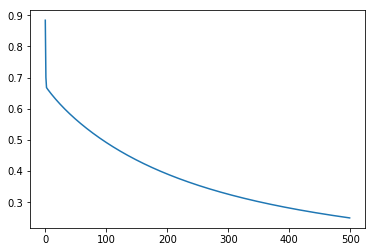

In [29]:
plt.plot(errors)

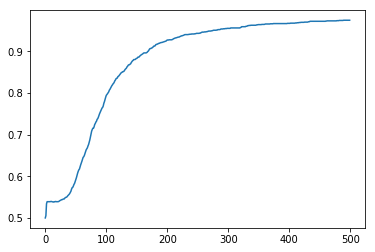

In [30]:
plt.plot(accs)

In [31]:
y_hats, c_hats = predicts(pred_w0, pred_w1, pred_b, xs)

In [32]:
n_correct = np.equal(c_hats, ys).sum()

print(n_correct)

1950


In [33]:
accuracy = n_correct / len(c_hats)

print(accuracy)

0.975


In [34]:
calc_errors(y_hats, ys)

0.2500634472605684

In [35]:
incorrect_examples = np.where(np.equal(c_hats, ys) == False)

In [36]:
incorrect_points = xs[incorrect_examples]

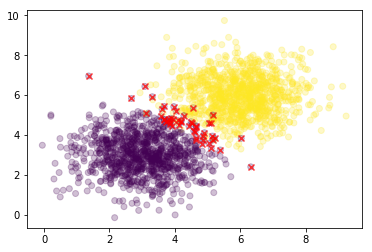

In [37]:
plt.scatter(xs[:,0], xs[:,1], c=ys, alpha=0.25)
plt.scatter(incorrect_points[:,0], incorrect_points[:,1], c='r', marker='x', alpha=0.75)
plt.show()